In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
p = []

with open("./part2_1a.log", "r") as f:
    for line in f.readlines():
        try:
            syls = line.split()
            # if int(syls[1][0])==1:
            if int(syls[2])>200 or int(syls[3])>200: continue
            p.append((int(syls[1][0]), int(syls[2]), int(syls[3])))
            # elif int(syls[1])==2:
            #     p2.append((int(syls[1]), int(syls[2]), int(syls[3])))
        except:
            pass

In [46]:
p_num = np.array(p)

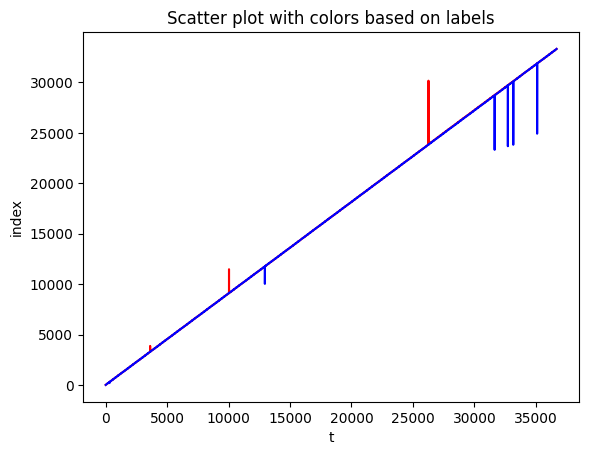

In [53]:
x = p_num[:, 1]
y = p_num[:, 2]
labels= p_num[:, 0]

plt.plot(182*x[labels==1] + y[labels==1], color='red')
plt.plot(182*x[labels==2] + y[labels==2], color='blue')

# Add labels and title
plt.xlabel('t')
plt.ylabel('index')
plt.title('Scatter plot with colors based on labels')

# Show the plot
plt.show()

In [50]:
max(x)

182